# Using Wikipedia, Pandas, and Geopandas visualize all the Ancient Libraries and Where they were

Helpful Websites:
    1. https://www.thecrazyprogrammer.com/2018/05/wikipedia-api-python-tutorial.html
    
Installation of package: pip install wikipedia

In [93]:
import wikipedia
import regex as re
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib as plt

# Apply Wikipedia Package

Variables

In [94]:
w_page = "List of coups d'état and coup attempts by country"
col_names = ["Date", "NAME", "Coups"]
output_table = "test.csv"



In [95]:
w_page = wikipedia.page(w_page)
print(w_page.content)

This is a list by country of coups d'état and coup attempts, in chronological order.


== Afghanistan ==
February 20, 1919: Nasrullah Khan overthrows Habibullah Khan
February 28, 1919: Amanullah Khan overthrows Nasrullah Khan
January 17, 1929: Habibullah Kalakani overthrows Inayatullah Khan
October 16, 1929: Mohammed Nadir Shah overthrows Habibullāh Kalakāni
July 17, 1973: Mohammed Daoud Khan overthrows Mohammed Zahir Shah
December 9, 1976: Qiyam-i Islami (Islamic Uprising) attempts and fails to overthrow Mohammed Daoud Khan
April 30, 1978: Abdul Qadir overthrows Mohammed Daoud Khan
September 16, 1979: Hafizullah Amin overthrows Nur Muhammad Taraki
December 27, 1979: Babrak Karmal overthrows Hafizullah Amin
March 6, 1990: Shahnawaz Tanai attempts and fails to overthrow Mohammad Najibullah


== Albania ==
September 14, 1998: The funeral of MP Azem Hajdari turns violent as the office of the Albanian Prime Minister Fatos Nano is attacked, obliging the latter to hastily flee and step down 

In [96]:
text = w_page.content
text

'This is a list by country of coups d\'état and coup attempts, in chronological order.\n\n\n== Afghanistan ==\nFebruary 20, 1919: Nasrullah Khan overthrows Habibullah Khan\nFebruary 28, 1919: Amanullah Khan overthrows Nasrullah Khan\nJanuary 17, 1929: Habibullah Kalakani overthrows Inayatullah Khan\nOctober 16, 1929: Mohammed Nadir Shah overthrows Habibullāh Kalakāni\nJuly 17, 1973: Mohammed Daoud Khan overthrows Mohammed Zahir Shah\nDecember 9, 1976: Qiyam-i Islami (Islamic Uprising) attempts and fails to overthrow Mohammed Daoud Khan\nApril 30, 1978: Abdul Qadir overthrows Mohammed Daoud Khan\nSeptember 16, 1979: Hafizullah Amin overthrows Nur Muhammad Taraki\nDecember 27, 1979: Babrak Karmal overthrows Hafizullah Amin\nMarch 6, 1990: Shahnawaz Tanai attempts and fails to overthrow Mohammad Najibullah\n\n\n== Albania ==\nSeptember 14, 1998: The funeral of MP Azem Hajdari turns violent as the office of the Albanian Prime Minister Fatos Nano is attacked, obliging the latter to hastily 

In [97]:
open('temp.txt', 'a').close()

In [98]:
with open('temp.txt', "w", encoding="utf-8") as f:
    f.write(text)



In [99]:
df = pd.read_csv('temp.txt', sep = '==',  header = None, skiprows =1)
df
#skiprows = 1


C:\Users\fcmun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2
0,NaN,Afghanistan,NaN
1,"February 20, 1919: Nasrullah Khan overthrows H...",None,NaN
2,"February 28, 1919: Amanullah Khan overthrows N...",None,NaN
3,"January 17, 1929: Habibullah Kalakani overthro...",None,NaN
4,"October 16, 1929: Mohammed Nadir Shah overthro...",None,NaN
5,"July 17, 1973: Mohammed Daoud Khan overthrows ...",None,NaN
6,"December 9, 1976: Qiyam-i Islami (Islamic Upri...",None,NaN
7,"April 30, 1978: Abdul Qadir overthrows Mohamme...",None,NaN
8,"September 16, 1979: Hafizullah Amin overthrows...",None,NaN
9,"December 27, 1979: Babrak Karmal overthrows Ha...",None,NaN


In [100]:
df.columns = col_names
df

,Date,NAME,Coups
0,NaN,Afghanistan,NaN
1,"February 20, 1919: Nasrullah Khan overthrows H...",None,NaN
2,"February 28, 1919: Amanullah Khan overthrows N...",None,NaN
3,"January 17, 1929: Habibullah Kalakani overthro...",None,NaN
4,"October 16, 1929: Mohammed Nadir Shah overthro...",None,NaN
5,"July 17, 1973: Mohammed Daoud Khan overthrows ...",None,NaN
6,"December 9, 1976: Qiyam-i Islami (Islamic Upri...",None,NaN
7,"April 30, 1978: Abdul Qadir overthrows Mohamme...",None,NaN
8,"September 16, 1979: Hafizullah Amin overthrows...",None,NaN
9,"December 27, 1979: Babrak Karmal overthrows Ha...",None,NaN


In [101]:
df.iloc[:, 1] = df.iloc[:, 1].fillna(method='ffill')
df


,Date,NAME,Coups
0,NaN,Afghanistan,NaN
1,"February 20, 1919: Nasrullah Khan overthrows H...",Afghanistan,NaN
2,"February 28, 1919: Amanullah Khan overthrows N...",Afghanistan,NaN
3,"January 17, 1929: Habibullah Kalakani overthro...",Afghanistan,NaN
4,"October 16, 1929: Mohammed Nadir Shah overthro...",Afghanistan,NaN
5,"July 17, 1973: Mohammed Daoud Khan overthrows ...",Afghanistan,NaN
6,"December 9, 1976: Qiyam-i Islami (Islamic Upri...",Afghanistan,NaN
7,"April 30, 1978: Abdul Qadir overthrows Mohamme...",Afghanistan,NaN
8,"September 16, 1979: Hafizullah Amin overthrows...",Afghanistan,NaN
9,"December 27, 1979: Babrak Karmal overthrows Ha...",Afghanistan,NaN


In [102]:
df2 = df[pd.notnull(df.iloc[:, 0])]
df2.iloc[:, 1] = df2.iloc[:, 1].str.replace('=','')
df2.iloc[:, 1] = df2.iloc[:, 1].str.replace(' ','')
df2.iloc[:, 1] = df2.iloc[:, 1].str.replace('Anatolia','Turkey')
df2

C:\Users\fcmun\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Date,NAME,Coups
1,"February 20, 1919: Nasrullah Khan overthrows H...",Afghanistan,NaN
2,"February 28, 1919: Amanullah Khan overthrows N...",Afghanistan,NaN
3,"January 17, 1929: Habibullah Kalakani overthro...",Afghanistan,NaN
4,"October 16, 1929: Mohammed Nadir Shah overthro...",Afghanistan,NaN
5,"July 17, 1973: Mohammed Daoud Khan overthrows ...",Afghanistan,NaN
6,"December 9, 1976: Qiyam-i Islami (Islamic Upri...",Afghanistan,NaN
7,"April 30, 1978: Abdul Qadir overthrows Mohamme...",Afghanistan,NaN
8,"September 16, 1979: Hafizullah Amin overthrows...",Afghanistan,NaN
9,"December 27, 1979: Babrak Karmal overthrows Ha...",Afghanistan,NaN
10,"March 6, 1990: Shahnawaz Tanai attempts and fa...",Afghanistan,NaN


In [103]:
df2[['Dates', 'Coups']] = df2['Date'].str.split(':', n=1, expand = True)
df2

C:\Users\fcmun\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Date,NAME,Coups,Dates
1,"February 20, 1919: Nasrullah Khan overthrows H...",Afghanistan,Nasrullah Khan overthrows Habibullah Khan,"February 20, 1919"
2,"February 28, 1919: Amanullah Khan overthrows N...",Afghanistan,Amanullah Khan overthrows Nasrullah Khan,"February 28, 1919"
3,"January 17, 1929: Habibullah Kalakani overthro...",Afghanistan,Habibullah Kalakani overthrows Inayatullah Khan,"January 17, 1929"
4,"October 16, 1929: Mohammed Nadir Shah overthro...",Afghanistan,Mohammed Nadir Shah overthrows HabibullÄ�h Ka...,"October 16, 1929"
5,"July 17, 1973: Mohammed Daoud Khan overthrows ...",Afghanistan,Mohammed Daoud Khan overthrows Mohammed Zahir...,"July 17, 1973"
6,"December 9, 1976: Qiyam-i Islami (Islamic Upri...",Afghanistan,Qiyam-i Islami (Islamic Uprising) attempts an...,"December 9, 1976"
7,"April 30, 1978: Abdul Qadir overthrows Mohamme...",Afghanistan,Abdul Qadir overthrows Mohammed Daoud Khan,"April 30, 1978"
8,"September 16, 1979: Hafizullah Amin overthrows...",Afghanistan,Hafizullah Amin overthrows Nur Muhammad Taraki,"September 16, 1979"
9,"December 27, 1979: Babrak Karmal overthrows Ha...",Afghanistan,Babrak Karmal overthrows Hafizullah Amin,"December 27, 1979"
10,"March 6, 1990: Shahnawaz Tanai attempts and fa...",Afghanistan,Shahnawaz Tanai attempts and fails to overthr...,"March 6, 1990"


In [104]:
groups = df2.groupby('NAME', as_index=False).count()
groups


,NAME,Date,Coups,Dates
0,Afghanistan,10,10,10
1,Albania,1,1,1
2,Algeria,3,3,3
3,Argentina,11,11,11
4,Austria,1,1,1
5,Azerbaijan,2,2,2
6,Bangladesh,8,8,8
7,Benin,6,6,6
8,Bolivia,14,14,14
9,Bophuthatswana,1,1,1


In [105]:
df2.to_csv(output_table)

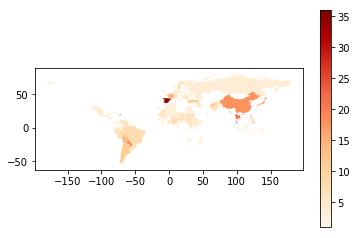

In [106]:
geo_data = gpd.read_file('C:\\Users\\fcmun\\Documents\\Geopandas_Practice_Files\\Country_Data.shp')
country_shapes = geo_data.merge(groups, on='NAME')
country_shapes.plot('Date', cmap='OrRd', legend = True)
